In [1]:
#conda install -c conda-forge shap

In [2]:
from loaders.Loaders import CSVLoader
from compoundFeaturization.rdkitFingerprints import MorganFingerprint, MACCSkeysFingerprint
from splitters.splitters import SingletaskStratifiedSplitter
from metrics.Metrics import Metric
from metrics.metricsFunctions import r2_score, roc_auc_score, precision_score, accuracy_score, confusion_matrix, classification_report, f1_score

from sklearn.ensemble import RandomForestClassifier

from featureSelection.baseFeatureSelector import LowVarianceFS

from models.sklearnModels import SklearnModel

import shap

In [3]:
#Load Dataset
dataset = CSVLoader(dataset_path='preprocessed_dataset_wfoodb.csv', 
                    mols_field='Smiles', 
                    labels_fields='Class', 
                    id_field='ID')#, shard_size=4000)
dataset = dataset.create_dataset()
dataset.get_shape()

Mols_shape:  23290
Features_shape:  X not defined!
Labels_shape:  (23290,)


In [4]:
#Featurization
dataset = MACCSkeysFingerprint().featurize(dataset)
dataset.get_shape()
#Feature Selection
dataset = LowVarianceFS(0.15).featureSelection(dataset)
dataset.get_shape()

Featurizing datapoint 0
Featurizing datapoint 1000
Featurizing datapoint 2000
Featurizing datapoint 3000
Featurizing datapoint 4000
Featurizing datapoint 5000
Featurizing datapoint 6000


RDKit ERROR: [14:36:39] Explicit valence for atom # 1 Cl, 4, is greater than permitted


error in smile: O=[Cl]=O
Featurizing datapoint 7000


RDKit ERROR: [14:36:42] Explicit valence for atom # 3 B, 4, is greater than permitted
RDKit ERROR: [14:36:42] Explicit valence for atom # 1 Cl, 9, is greater than permitted


error in smile: OB1O[B]2(O)OB(O)O[B](O)(O1)O2
error in smile: O=[Cl-](=O)(=O)=O
Featurizing datapoint 8000
Featurizing datapoint 9000
Featurizing datapoint 10000
Featurizing datapoint 11000
Featurizing datapoint 12000
Featurizing datapoint 13000
Featurizing datapoint 14000


RDKit ERROR: [14:37:03] Explicit valence for atom # 0 P, 11, is greater than permitted


error in smile: [P](OCC=C(C)C)(OCC=C(C)C)(=O)(OP(OCC=C(C)C)(OCC=C(C)C)=O)(CC=C(C)C)(CC=C(C)C)(CC=C(C)C)(CC=C(C)C)(CC=C(C)C)CC=C(C)C
Featurizing datapoint 15000
Featurizing datapoint 16000
Featurizing datapoint 17000
Featurizing datapoint 18000
Featurizing datapoint 19000
Featurizing datapoint 20000
Featurizing datapoint 21000
Featurizing datapoint 22000
Featurizing datapoint 23000
Elements with indexes:  [6257, 7708, 7709, 14244]  were removed due to the presence of NAs!
The elements in question are:  ['O=[Cl]=O' 'OB1O[B]2(O)OB(O)O[B](O)(O1)O2' 'O=[Cl-](=O)(=O)=O'
 '[P](OCC=C(C)C)(OCC=C(C)C)(=O)(OP(OCC=C(C)C)(OCC=C(C)C)=O)(CC=C(C)C)(CC=C(C)C)(CC=C(C)C)(CC=C(C)C)(CC=C(C)C)CC=C(C)C']
Mols_shape:  23286
Features_shape:  (23286, 167)
Labels_shape:  (23286,)
Mols_shape:  23286
Features_shape:  (23286, 70)
Labels_shape:  (23286,)


In [5]:
#Data Split
splitter = SingletaskStratifiedSplitter()
train_dataset, _, test_dataset = splitter.train_valid_test_split(dataset=dataset, frac_train=0.7, 
                                                                             frac_valid=0, frac_test=0.3)

(16296, 70)
(0, 70)
(6984, 70)


In [6]:
#pip install xgboost

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


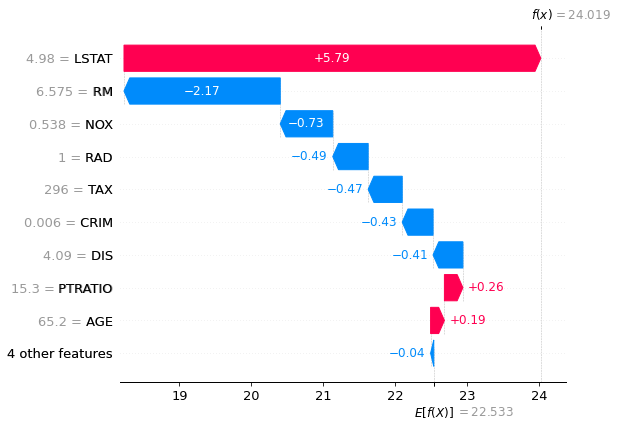

In [7]:
import xgboost
import shap

# train an XGBoost model
X, y = shap.datasets.boston()
model = xgboost.XGBRegressor().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [8]:
import pandas as pd

columns_names = ['feat_'+str(i) for i in range(dataset.X.shape[1])]

df = pd.DataFrame(train_dataset.X, columns = columns_names)

In [9]:
print(df.shape)
print(train_dataset.X.shape)
print(len(train_dataset.y))

(16296, 70)
(16296, 70)
16296


In [10]:
#Scikit-Learn Random Forest
rf = RandomForestClassifier()

rf.fit(df, train_dataset.y)

RandomForestClassifier()

In [ ]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(rf)
shap_values = explainer(train_dataset.X)